## West Nile Virus Prediction
* West Nile virus is most commonly spread to humans through infected mosquitos. Around 20% of people who become infected with the virus develop symptoms ranging from a persistent fever, to serious neurological illnesses that can result in death. 
    In 2002, the first human cases of West Nile virus were reported in Chicago. By 2004 the City of Chicago and the Chicago Department of Public Health (CDPH) had established a comprehensive surveillance and control program that is still in effect today.

* Every week from late spring through the fall, mosquitos in traps across the city are tested for the virus. The results of these tests influence when and where the city will spray airborne pesticides to control adult mosquito populations. 

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('zerotogbms-project')
jovian.set_colab_id('1TFHex3rE60ePLBcxeIBj_Mry_KaGdD9j')

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

**Getting started with the data aquisition**

*The datasets are to be downloaded from the kaggle competition datasets using opendatasets and then adding the data csv files which are going to be extracted from downloaded zipfiles into dataframes*

In [4]:
!pip install opendatasets

In [5]:
import os
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [6]:
od.download('https://www.kaggle.com/c/predict-west-nile-virus')

Skipping, found downloaded files in "./predict-west-nile-virus" (use force=True to force download)


In [7]:
for dirname, _, filenames in os.walk('/content/predict-west-nile-virus'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/predict-west-nile-virus/train.csv.zip
/content/predict-west-nile-virus/mapdata_copyright_openstreetmap_contributors.rds
/content/predict-west-nile-virus/west_nile.zip
/content/predict-west-nile-virus/weather.csv.zip
/content/predict-west-nile-virus/mapdata_copyright_openstreetmap_contributors.txt.zip
/content/predict-west-nile-virus/spray.csv.zip
/content/predict-west-nile-virus/sampleSubmission.csv.zip
/content/predict-west-nile-virus/noaa_weather_qclcd_documentation.pdf
/content/predict-west-nile-virus/test.csv.zip


In [8]:
train = pd.read_csv("/content/predict-west-nile-virus/train.csv.zip")
test = pd.read_csv("/content/predict-west-nile-virus/test.csv.zip")
weather = pd.read_csv("/content/predict-west-nile-virus/weather.csv.zip")

**Exploratory Data Analysis**

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [10]:
train .head(7)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0


In [11]:
# drop address columns
train = train.drop(['Address', 'AddressNumberAndStreet'], axis = 1)
test = test.drop(['Id', 'Address', 'AddressNumberAndStreet'], axis = 1)

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             116293 non-null  object 
 1   Species          116293 non-null  object 
 2   Block            116293 non-null  int64  
 3   Street           116293 non-null  object 
 4   Trap             116293 non-null  object 
 5   Latitude         116293 non-null  float64
 6   Longitude        116293 non-null  float64
 7   AddressAccuracy  116293 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 7.1+ MB


In [13]:
weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)

In [14]:
# Functions to extract month and day from dataset
# You can also use parse_dates of Pandas.
def create_month(x):
    return x.split('-')[1]

def create_day(x):
    return x.split('-')[2]

In [15]:
train['month'] = train.Date.apply(create_month)
train['day'] = train.Date.apply(create_day)
test['month'] = test.Date.apply(create_month)
test['day'] = test.Date.apply(create_day)


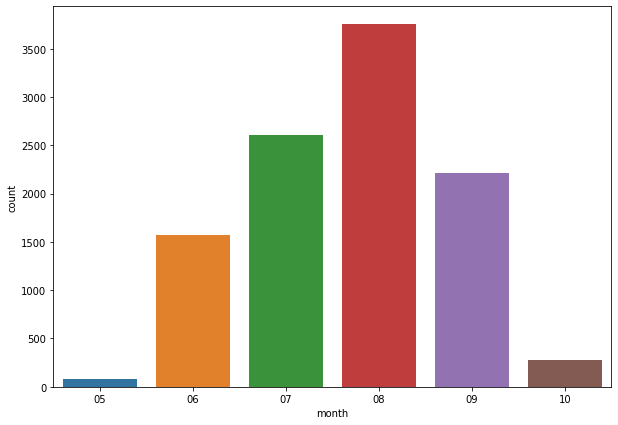

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x=train.month)


In [17]:
train.head(5)

,Date,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,month,day
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,9,1,0,05,29
1,2007-05-29,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,9,1,0,05,29
2,2007-05-29,CULEX RESTUANS,62,N MANDELL AVE,T007,41.994991,-87.769279,9,1,0,05,29
3,2007-05-29,CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,8,1,0,05,29
4,2007-05-29,CULEX RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,8,4,0,05,29


In [18]:
train = train.merge(weather, on='Date')
test = test.merge(weather, on='Date')
train = train.drop(['Date'], axis = 1)
test = test.drop(['Date'], axis = 1)

# Merge with weather data

In [19]:
train.drop(['CodeSum','NumMosquitos'],axis=1,inplace=True)

**Preprocessing Data for applying different machine learning algorithms**

In [20]:
from sklearn import preprocessing

In [21]:
# Convert categorical data to numbers
lbl = preprocessing.LabelEncoder()
lbl.fit(list(train['Species'].values) + list(test['Species'].values))
train['Species'] = lbl.transform(train['Species'].values)
test['Species'] = lbl.transform(test['Species'].values)

In [22]:
lbl.fit(list(train['Street'].values) + list(test['Street'].values))
train['Street'] = lbl.transform(train['Street'].values)
test['Street'] = lbl.transform(test['Street'].values)

In [23]:
lbl.fit(list(train['Trap'].values) + list(test['Trap'].values))
train['Trap'] = lbl.transform(train['Trap'].values)
test['Trap'] = lbl.transform(test['Trap'].values)

In [24]:
categorical_cols = train.select_dtypes('object').columns.tolist()
categorical_cols

['month',
 'day',
 'Tavg',
 'Depart',
 'WetBulb',
 'Heat',
 'Cool',
 'Sunrise',
 'Sunset',
 'Depth',
 'SnowFall',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'AvgSpeed']

In [25]:
for col in categorical_cols:
  train[col]=train[col].astype(float)
  test[col]=test[col].astype(float)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21012 entries, 0 to 21011
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Species          21012 non-null  int64  
 1   Block            21012 non-null  int64  
 2   Street           21012 non-null  int64  
 3   Trap             21012 non-null  int64  
 4   Latitude         21012 non-null  float64
 5   Longitude        21012 non-null  float64
 6   AddressAccuracy  21012 non-null  int64  
 7   WnvPresent       21012 non-null  int64  
 8   month            21012 non-null  float64
 9   day              21012 non-null  float64
 10  Station          21012 non-null  int64  
 11  Tmax             21012 non-null  int64  
 12  Tmin             21012 non-null  int64  
 13  Tavg             21012 non-null  float64
 14  Depart           21012 non-null  float64
 15  DewPoint         21012 non-null  int64  
 16  WetBulb          21012 non-null  float64
 17  Heat        

In [26]:
train.describe()

,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,WnvPresent,month,day,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
count,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.0,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000,21012.000000
mean,2.106320,35.687797,69.545783,77.726537,41.841139,-87.699908,7.819532,0.052446,7.692557,15.341424,1.500000,81.917095,63.647202,73.022463,0.870122,59.673853,64.508138,0.886208,8.908671,233.728631,934.927280,-0.500000,-1.0,-0.508471,0.048855,29.147445,29.960729,5.941238,17.639397,7.453531
std,0.939574,24.338889,40.688616,44.153594,0.112739,0.096512,1.452886,0.222930,1.067649,8.900993,0.500012,8.290251,7.593949,7.501455,4.953146,7.831989,8.008442,2.712230,5.755434,236.929985,937.015015,0.500012,0.0,0.499940,0.509012,2.013578,0.117063,2.882575,9.279392,2.537230
min,0.000000,10.000000,0.000000,0.000000,41.644612,-87.930995,3.000000,0.000000,5.000000,1.000000,1.000000,57.000000,41.000000,50.000000,-12.000000,38.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,29.590000,0.100000,1.000000,2.100000
25%,1.000000,12.000000,36.000000,38.000000,41.732984,-87.760070,8.000000,0.000000,7.000000,7.000000,1.000000,78.000000,59.000000,70.000000,-1.000000,54.000000,61.000000,0.000000,5.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,0.000000,29.200000,29.890000,3.900000,9.000000,5.800000
50%,2.000000,33.000000,64.000000,85.000000,41.846283,-87.694991,8.000000,0.000000,8.000000,15.000000,1.500000,83.000000,65.000000,75.000000,-1.000000,60.000000,66.000000,0.000000,10.000000,207.500000,859.500000,-0.500000,-1.0,-1.000000,0.000000,29.280000,29.960000,5.500000,19.000000,7.100000
75%,3.000000,52.000000,104.000000,113.000000,41.954690,-87.627796,9.000000,0.000000,8.000000,24.000000,2.000000,88.000000,69.000000,79.000000,4.000000,67.000000,70.000000,0.000000,14.000000,449.000000,1907.000000,0.000000,-1.0,0.000000,0.110000,29.360000,30.050000,7.800000,24.000000,9.300000
max,6.000000,98.000000,138.000000,148.000000,42.017430,-87.531635,9.000000,1.000000,10.000000,31.000000,2.000000,97.000000,79.000000,87.000000,18.000000,73.000000,76.000000,15.000000,22.000000,557.000000,1931.000000,0.000000,-1.0,0.000000,3.970000,29.650000,30.330000,15.400000,36.000000,16.300000


In [27]:
train_inputs=train.drop(["WnvPresent"],axis=1)

In [28]:
train_targets=train["WnvPresent"].values

In [29]:
train_targets

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
train.WnvPresent.unique()

array([0, 1])

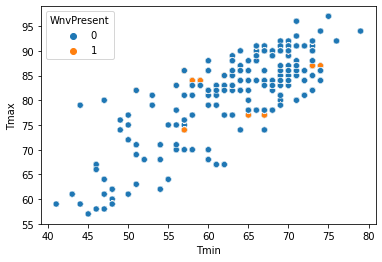

In [31]:
sns.scatterplot(x="Tmin",y="Tmax",data=train,hue="WnvPresent")

In [32]:
#considering validation data
from sklearn.model_selection import train_test_split
train_inputs1,val_inputs,train_targets1,val_targets=train_test_split(train_inputs,train_targets,test_size=0.2)

In [33]:
print(train_inputs.shape,val_inputs.shape)

(21012, 29) (4203, 29)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
key = ['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier',]
value = [KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=1000,n_jobs=-1)]
models = dict(zip(key,value))
print(models)

{'KNeighborsClassifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 'DecisionTreeClassifier': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'RandomForestClassifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                   

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [37]:
predicted =[]
train_acc=[]
for name,algo in models.items():
    model=algo
    model.fit(train_inputs1,train_targets1)
    acc1=accuracy_score(train_targets1,model.predict(train_inputs1))
    train_acc.append(acc1)
    predict = model.predict(val_inputs)
    acc = accuracy_score(val_targets, predict)
    predicted.append(acc)
df_accuracy=pd.DataFrame({'algo_name':key,
                          "train_acc":train_acc,
                          'accuracy':predicted})
df_accuracy 

,algo_name,train_acc,accuracy
0,KNeighborsClassifier,0.950681,0.942898
1,DecisionTreeClassifier,0.981914,0.949084
2,RandomForestClassifier,0.981914,0.940043


**HyperParameterTuning**

In [38]:
def test_params(**params):
    model =RandomForestClassifier(random_state=42,n_jobs=-1, **params).fit(train_inputs1, train_targets1)
    train_accuracy = accuracy_score(model.predict(train_inputs1), train_targets1)
    val_accuracy = accuracy_score(model.predict(val_inputs), val_targets)
    return train_accuracy, val_accuracy

In [39]:
test_params(criterion='entropy',max_depth=50,min_samples_leaf=5,n_estimators=600)
#It is better than the before accuracy scores for validatin set

(0.9522279731096437, 0.9505115393766357)

In [40]:
test_params(criterion="gini",max_depth=70,min_samples_leaf=5,n_estimators=800,min_samples_split=5)
#considering these parameters as best

(0.9515140698435361, 0.9512253152510112)

In [41]:
best_fit_model=RandomForestClassifier(random_state=42,n_jobs=-1,criterion="gini",max_depth=70,min_samples_leaf=5,n_estimators=800,min_samples_split=5).fit(train_inputs1,train_targets1)

In [42]:
test.drop(['CodeSum'],axis=1,inplace=True)

In [43]:
test_targets=best_fit_model.predict(test)
test_targets

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
test["predicted"]=test_targets

In [45]:
test

,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,month,day,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,predicted
0,2,41,36,1,41.954690,-87.800991,9,6.0,11.0,1,86,61,74.0,7.0,56,64.0,0.0,9.0,416.0,1926.0,0.0,-1,0.0,0.00,29.28,29.99,8.9,18,10.0,0
1,2,41,36,1,41.954690,-87.800991,9,6.0,11.0,2,86,66,76.0,-1.0,55,64.0,0.0,11.0,-1.0,-1.0,-1.0,-1,-1.0,0.00,29.34,29.97,9.4,18,10.4,0
2,3,41,36,1,41.954690,-87.800991,9,6.0,11.0,1,86,61,74.0,7.0,56,64.0,0.0,9.0,416.0,1926.0,0.0,-1,0.0,0.00,29.28,29.99,8.9,18,10.0,0
3,3,41,36,1,41.954690,-87.800991,9,6.0,11.0,2,86,66,76.0,-1.0,55,64.0,0.0,11.0,-1.0,-1.0,-1.0,-1,-1.0,0.00,29.34,29.97,9.4,18,10.4,0
4,1,41,36,1,41.954690,-87.800991,9,6.0,11.0,1,86,61,74.0,7.0,56,64.0,0.0,9.0,416.0,1926.0,0.0,-1,0.0,0.00,29.28,29.99,8.9,18,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232581,5,21,18,42,41.925652,-87.633590,8,10.0,2.0,2,75,66,71.0,-1.0,63,65.0,0.0,6.0,-1.0,-1.0,-1.0,-1,-1.0,0.72,29.10,29.78,7.2,17,7.9,0
232582,7,21,18,42,41.925652,-87.633590,8,10.0,2.0,1,72,63,68.0,10.0,61,63.0,0.0,3.0,549.0,1732.0,0.0,-1,0.0,0.32,29.03,29.78,7.2,17,7.9,0
232583,7,21,18,42,41.925652,-87.633590,8,10.0,2.0,2,75,66,71.0,-1.0,63,65.0,0.0,6.0,-1.0,-1.0,-1.0,-1,-1.0,0.72,29.10,29.78,7.2,17,7.9,0
232584,0,21,18,42,41.925652,-87.633590,8,10.0,2.0,1,72,63,68.0,10.0,61,63.0,0.0,3.0,549.0,1732.0,0.0,-1,0.0,0.32,29.03,29.78,7.2,17,7.9,0


In [46]:
# Execute this to save new versions of the notebook
jovian.commit(project="zerotogbms-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/vissu1007/zerotogbms-project


'https://jovian.ai/vissu1007/zerotogbms-project'

In [47]:
jovian.submit(assignment="zerotogbms-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/vissu1007/zerotogbms-project
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/course-project-real-world-machine-learning-model
